# Example-2

There is a beam of length 30 meters. A moment of magnitude 120 Nm is applied in the counter-clockwise direction at the end of the beam. A point load of magnitude 8 N is applied from the top of the beam at the starting point. There are two simple supports below the beam. One at the end and another one at a distance of 10 meters from the start. The deflection is restricted at both the supports.

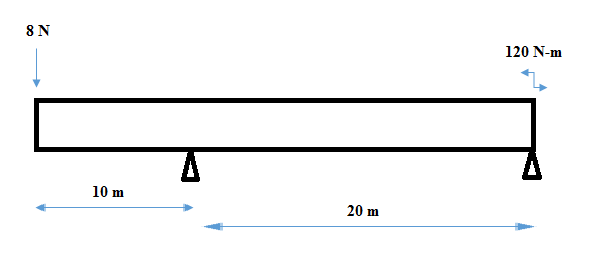

In [29]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

In [30]:
# Symbolizing Unknown Parameters
E,I = symbols('E,I')
R1,R2 = symbols('R1,R2')

In [31]:
# Defining Beam
B = Beam(30,E,I)

In [32]:
# Applying Loads
B.apply_load(-8,0,-1)
B.apply_load(-120,30,-2)
B.apply_load(R1,10,-1)
B.apply_load(R2,30,-1)

In [33]:
# Applying Boundary Conditions
B.bc_deflection.append((10,0))
B.bc_deflection.append((30,0))

In [34]:
B.solve_for_reaction_loads(R1,R2)
B.reaction_loads

{R1: 18, R2: -10}

In [35]:
B.load

-8*SingularityFunction(x, 0, -1) + 18*SingularityFunction(x, 10, -1) - 120*SingularityFunction(x, 30, -2) - 10*SingularityFunction(x, 30, -1)

In [36]:
B.length

30

In [37]:
B.boundary_conditions

{'deflection': [(10, 0), (30, 0)], 'slope': []}

In [38]:
B.shear_force()

-8*SingularityFunction(x, 0, 0) + 18*SingularityFunction(x, 10, 0) - 120*SingularityFunction(x, 30, -1) - 10*SingularityFunction(x, 30, 0)

In [39]:
B.bending_moment()

-8*SingularityFunction(x, 0, 1) + 18*SingularityFunction(x, 10, 1) - 120*SingularityFunction(x, 30, 0) - 10*SingularityFunction(x, 30, 1)

In [40]:
B.deflection()

(1600*x/3 - 4*SingularityFunction(x, 0, 3)/3 + 3*SingularityFunction(x, 10, 3) - 60*SingularityFunction(x, 30, 2) - 5*SingularityFunction(x, 30, 3)/3 - 4000)/(E*I)

In [41]:
B.slope()

(-4*SingularityFunction(x, 0, 2) + 9*SingularityFunction(x, 10, 2) - 120*SingularityFunction(x, 30, 1) - 5*SingularityFunction(x, 30, 2) + 1600/3)/(E*I)

In [45]:
B.max_shear_force()

(Interval(10, 30), 10)

In [46]:
B.max_bmoment()

(30, 120)